#可視化(目的関数別)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 cap-shape 

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 cap-surface 

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 cap-color 

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 bruises 

f    4748
t    3376
Name: bruises, dtype: int64

 odor 

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

 gill-attachment 

f    7914
a     210
Name: gill-attachment, dtype: int64

 gill-spacing 

c    6812
w    1312
Name: gill-spacing, dtype: int64

 gill-size 

b    5612
n    2512
Name: gill-size, dtype: int64

 gill-color 

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: 

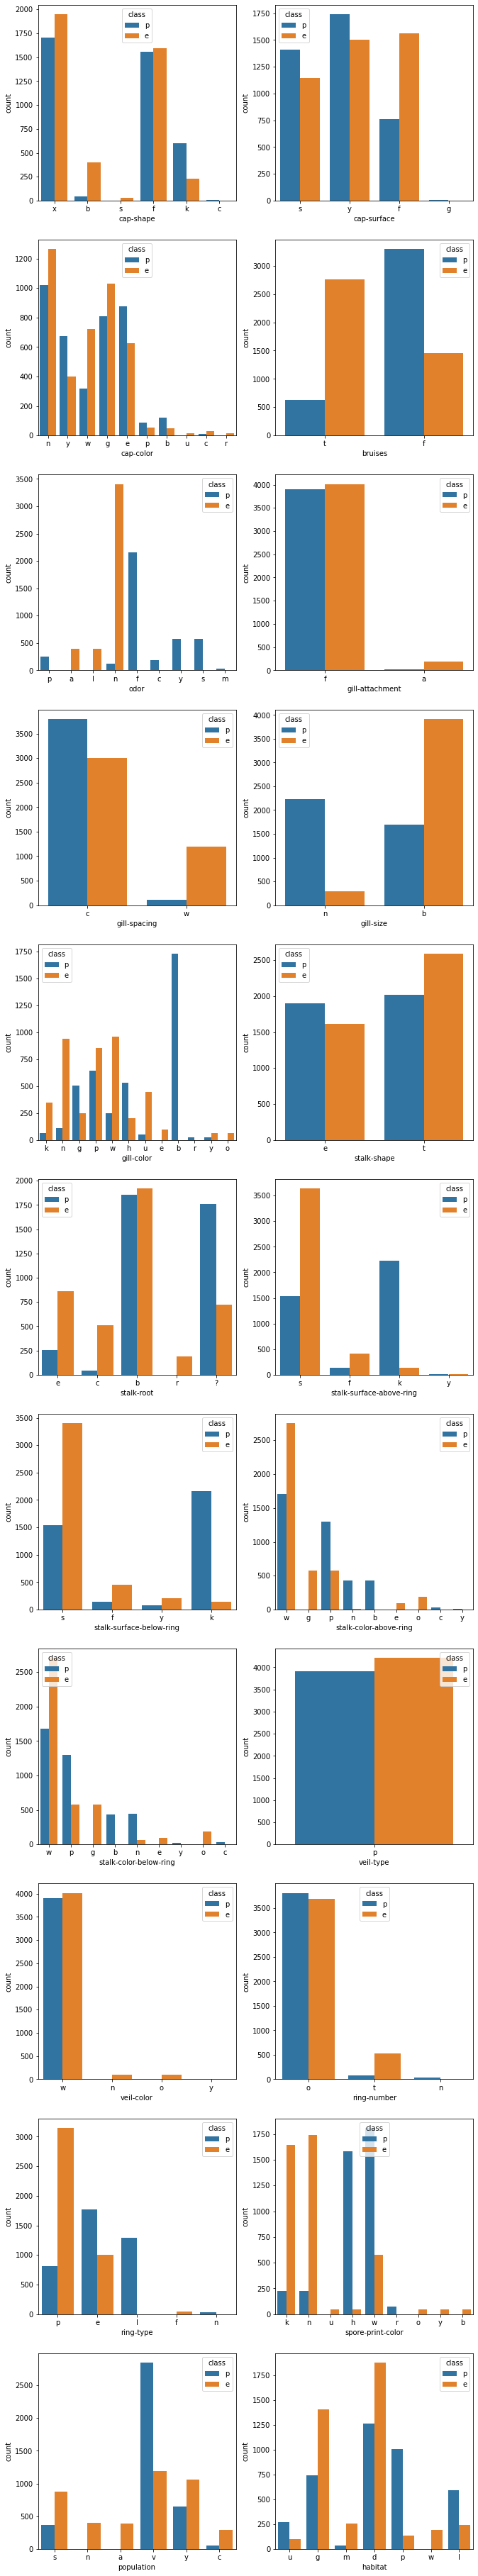

In [62]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/Mushroom_Classification/mushrooms.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

#特徴量
data_x = data.drop(['class'],axis=1)
data_y = data['class']

for column in data_x.columns:
    print('\n',column,'\n')
    print(data_x[column].value_counts())
  # sns.catplot(x=column,data=data, kind="count")
  # plt.title('Visual of each data')    
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(11, 66))

for x, ax in zip(data_x, axs.ravel()):
    sns.countplot(x=x, hue=data_y, data=data_x, ax = ax)
    
    #Plot the plots
    fig.show()

#可視化をもとに前処理  

特徴量|適性|理由
---|---|---|
cap-shape|×|e,pの差が見られないので不向き(x,f)  
cap-surface|×|e,pの差が見られないので不向き(s,y)  
gill-attachment|×|e,pの差が見られないので不向き(f,a)
stalk-shape|×|e,pの差が見られないので不向き(e,t) 
veil-type|×|e,pの差が見られないので不向き(p)  
veil-color|×|e,pの差が見られないので不向き(w)  
ring-number|×|e,pの差が見られないので不向き(o)
cap-color|○|e,pの差がある  
bruises	odor|○|e,pの差がある   
gill-spacing|○|e,pの差がある  
gill-size|○|e,pの差がある  
gill-color|○|e,pの差がある  
stalk-root|○|e,pの差がある  
stalk-surface-above-ring|○|e,pの差がある  
stalk-surface-below-ring|○|e,pの差がある  
stalk-color-above-ring|○|e,pの差がある  
stalk-color-below-ring|○|e,pの差がある  
ring-type|○|e,pの差がある  
spore-print-color|○|e,pの差がある  
population|○|e,pの差がある  
habitat|○|e,pの差がある

#ロジスティック回帰

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test score(ロジスティック回帰) :  1.0
1625 問中 1625 問正解


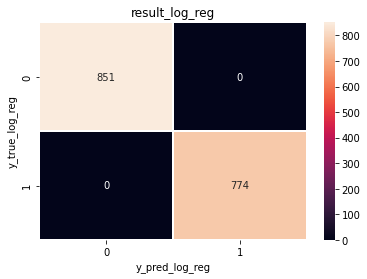

In [63]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/Mushroom_Classification/mushrooms.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

#特徴量
y = data['class']
x = data.drop(['class','veil-type','cap-shape','cap-surface','gill-attachment','stalk-shape','veil-color','ring-number'], axis=1)#×の特徴量を削除


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
x = pd.get_dummies(x)#多クラスの特徴量をone-hot表現に変換した



from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)#test_sizeは変更

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#標準化
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)
log_reg.fit(x_train_scaled, y_train)#学習
#print('train score : ', log_reg.score(x_train, y_train))
print('test score(ロジスティック回帰) : ', log_reg.score(x_test_scaled, y_test))
print(len(y_test),'問中',int(len(y_test) * log_reg.score(x_test_scaled, y_test)),'問正解')

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#可視化(ロジスティック)
from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(x_test_scaled)
y_true_log_reg = y_test
cm_log_reg = confusion_matrix(y_true_log_reg, y_pred_log_reg)
sns.heatmap(cm_log_reg,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_log_reg")
plt.xlabel("y_pred_log_reg")
plt.ylabel("y_true_log_reg")
plt.show()




#RFC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test score(RFC) :  1.0
1625 問中 1625 問正解


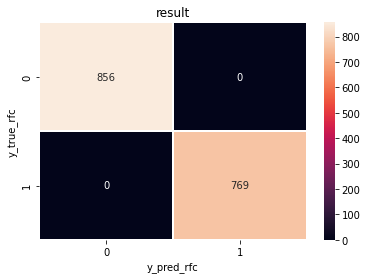

In [64]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/Mushroom_Classification/mushrooms.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

#特徴量
y = data['class']
x = data.drop(['class','veil-type','cap-shape','cap-surface','gill-attachment','stalk-shape','veil-color','ring-number'], axis=1)#×の特徴量を削除


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
x = pd.get_dummies(x)#多クラス(3以上)の特徴量をone-hot表現に変換した

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#RFC
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)#学習
#print('train score : ', RFC.score(x_train, y_train))
print('test score(RFC) : ', RFC.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * RFC.score(x_test, y_test)),'問正解')

#可視化(RFC)
from sklearn.metrics import confusion_matrix
y_pred_rfc = RFC.predict(x_test)
y_true_rfc = y_test
cm_rfc = confusion_matrix(y_true_rfc, y_pred_rfc)
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result")
plt.xlabel("y_pred_rfc")
plt.ylabel("y_true_rfc")
plt.show()

#決定木

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test score(決定木) :  1.0
1625 問中 1625 問正解


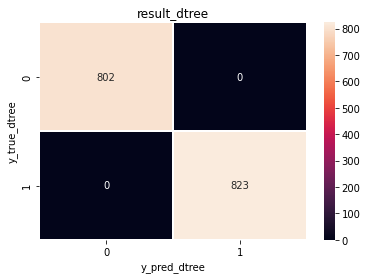

In [65]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/Mushroom_Classification/mushrooms.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

#特徴量
y = data['class']
x = data.drop(['class','veil-type','cap-shape','cap-surface','gill-attachment','stalk-shape','veil-color','ring-number'], axis=1)#×の特徴量を削除


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
x = pd.get_dummies(x)#多クラス(3以上)の特徴量をone-hot表現に変換した


from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 決定木
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)#学習
#print('train score : ', dtree.score(x_train, y_train))
print('test score(決定木) : ', dtree.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * dtree.score(x_test, y_test)),'問正解')

#可視化(決定木)
from sklearn.metrics import confusion_matrix
y_pred_dtree = dtree.predict(x_test)
y_true_dtree = y_test
cm_dtree = confusion_matrix(y_true_dtree, y_pred_dtree)
sns.heatmap(cm_dtree,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_dtree")
plt.xlabel("y_pred_dtree")
plt.ylabel("y_true_dtree")
plt.show()

#サポートベクターマシン

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test score(svc) :  1.0
1625 問中 1625 問正解


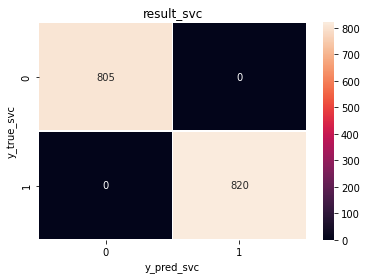

In [66]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/Mushroom_Classification/mushrooms.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

#特徴量
y = data['class']
x = data.drop(['class','veil-type','cap-shape','cap-surface','gill-attachment','stalk-shape','veil-color','ring-number'], axis=1)#×の特徴量を削除

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
x = pd.get_dummies(x)#多クラス(3以上)の特徴量をone-hot表現に変換した


from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)#学習
#print('train score : ', svc.score(x_train, y_train))
print('test score(svc) : ', svc.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * svc.score(x_test, y_test)),'問正解')

#可視化(SVC)
from sklearn.metrics import confusion_matrix
y_pred_svc = svc.predict(x_test)
y_true_svc = y_test
cm_svc = confusion_matrix(y_true_svc, y_pred_svc)
sns.heatmap(cm_svc,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_svc")
plt.xlabel("y_pred_svc")
plt.ylabel("y_true_svc")
plt.show()

#KNN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
max_Indexは、 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
max_accuracyは、 1.0


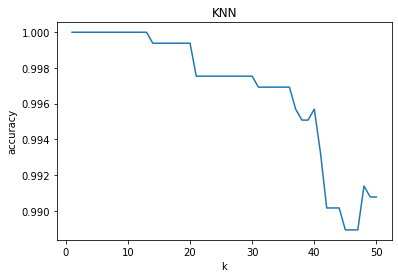

In [67]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/Mushroom_Classification/mushrooms.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

#特徴量
y = data['class']
x = data.drop(['class','veil-type','cap-shape','cap-surface','gill-attachment','stalk-shape','veil-color','ring-number'], axis=1)#×の特徴量を削除

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
x = pd.get_dummies(x)#多クラスの特徴量をone-hot表現に変換した


from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
scaler.fit(x_train)

list_k =[]
list_ac = []

#Kがどの値だとaccuracyが最も高いのかを確かめたい
for k in range(1,51):#kは1~
    knn = KNeighborsClassifier(n_neighbors=k)
    #transformで標準化を実際に行い、そのデータに対してサポートベクターマシンによる学習を行う
    knn.fit(scaler.transform(x_train), y_train)
    y_pred = knn.predict(scaler.transform(x_test))
    accuracy = accuracy_score(y_test,y_pred)
    
    #各kとそのときの正解率をリストに追加。後で図示のために利用。
    list_k.append(k)
    list_ac.append(accuracy)

#簡易的な図示    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("KNN")
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.plot(list_k, list_ac)
# 正解率が最大となるインデックスを求める.enumerateはインデックスと値のセット。
# iがインデックスでxが正解率。xが最大のときのインデックスのリスト。
maxIndex = [i+1 for i, x in enumerate(list_ac) if x == max(list_ac)]
print("max_Indexは、",maxIndex)
print("max_accuracyは、",max(list_ac))